In [9]:
import pandas as pd #for importing dataset
import numpy as nm #for doing mathematical operations
from sklearn.model_selection import train_test_split as ttp #to break dataset for training and testing
from sklearn.metrics import classification_report # to generate classification report
import re #for data cleaning purpose
import string #to deal with text data
import matplotlib.pyplot as plt #for visualizing dataset

In [10]:
data_true=pd.read_csv("/content/True.csv")
data_fake=pd.read_csv("/content/Fake.csv")

In [11]:
data_true.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [12]:
data_fake.head(5)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [13]:
data_true.shape, data_fake.shape

((21417, 4), (23481, 4))

In [14]:
data_true["class"]=1
data_fake["class"]=0

In [15]:
data_true_manual_testing = data_true.tail(10)
for i in range(21416,21406,-1):
    data_true.drop([i],axis=0, inplace=True)#removing those 10 values from original dataset

data_fake_manual_testing = data_fake.tail(10)
for i in range(21416,21406,-1):
    data_fake.drop([i],axis=0, inplace=True)#removing those 10 values from original dataset

In [16]:
data_manual_testing = pd.concat([data_fake_manual_testing, data_true_manual_testing], axis=0)
data_manual_testing.to_csv("manual_testing.csv ")

In [17]:
data_merge = pd.concat([data_fake,data_true],axis=0)
data_merge.head(10)#displaying first 10 values after above operation

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4449
politics            6841
politicsNews       11272
worldnews          10135
Name: text, dtype: int64


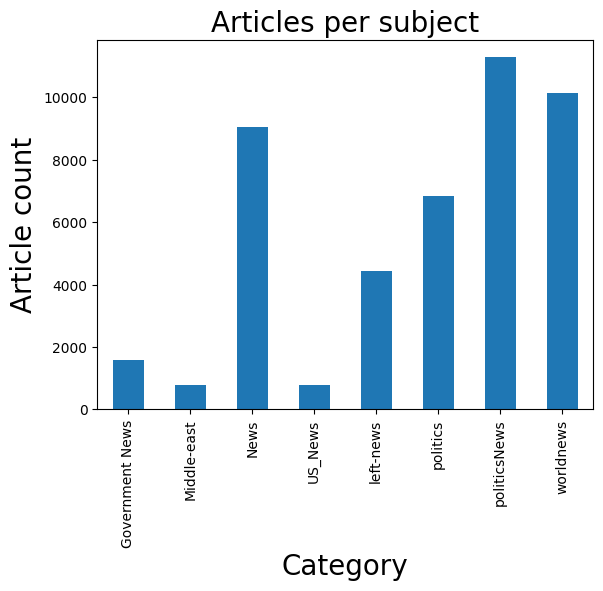

In [18]:
print(data_merge.groupby(['subject'])['text'].count())
data_merge.groupby(['subject'])['text'].count().plot(kind="bar")
plt.title("Articles per subject",size=20)
plt.xlabel("Category",size=20)
plt.ylabel("Article count",size=20)
plt.show()

class
0    23471
1    21407
Name: text, dtype: int64
0 = Fake news
1 = True news


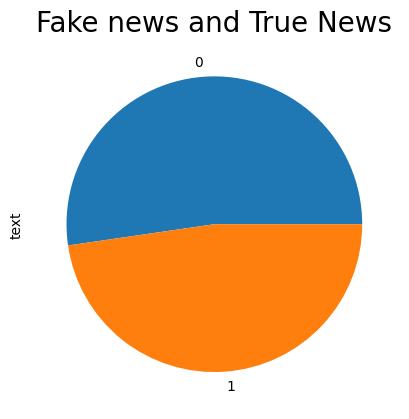

In [19]:
print(data_merge.groupby(['class'])['text'].count())
print("0 = Fake news\n1 = True news")
data_merge.groupby(['class'])['text'].count().plot(kind="pie")
plt.title("Fake news and True News",size=20)
plt.show()

In [20]:
data = data_merge.drop(["title","subject","date"], axis=1)
data.head(10) #displaying remaining dataset

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
5,The number of cases of cops brutalizing and ki...,0
6,Donald Trump spent a good portion of his day a...,0
7,In the wake of yet another court decision that...,0
8,Many people have raised the alarm regarding th...,0
9,Just when you might have thought we d get a br...,0


In [21]:
#shuffling data for better prediction
data=data.sample(frac=1)
data.head(10)

,text,class
18865,"DEMS,The Merrick Garland SHIP HAS SAILED Let ...",0
15118,Can you believe it? The clown that can t keep ...,0
18895,"Sen. Dick Durbin (D., Ill.) announced Tuesday ...",0
12209,BRUSSELS (Reuters) - French President Emmanuel...,1
13819,Girls aren t the only gender who will suffer e...,0
16030,Mark Steyn joined Tucker Carlson tonight to di...,0
12708,,0
1126,The Trump White House is now officially in ful...,0
12767,HANOI (Reuters) - Vietnam s government has pro...,1
15435,CARACAS (Reuters) - From his refuge at the Chi...,1


In [22]:
data.isnull().sum()

text     0
class    0
dtype: int64

In [23]:
#removing unwanted data with filtering
def filtering(data):
    text=data.lower()
    text=re.sub('\[.*?\]','',text)
    text=re.sub("\\W"," ",text)
    text=re.sub('https?://\s+|www\.S+','',text)
    text=re.sub('<.*?>+','',text)
    text=re.sub('[%s]'% re.escape(string.punctuation),'',text)
    text=re.sub('\w*\d\w*','',text)
    return text

In [24]:
data["text"]= data["text"].apply(filtering)
data.head(10)

,text,class
18865,dems the merrick garland ship has sailed let ...,0
15118,can you believe it the clown that can t keep ...,0
18895,sen dick durbin d ill announced tuesday ...,0
12209,brussels reuters french president emmanuel...,1
13819,girls aren t the only gender who will suffer e...,0
16030,mark steyn joined tucker carlson tonight to di...,0
12708,,0
1126,the trump white house is now officially in ful...,0
12767,hanoi reuters vietnam s government has pro...,1
15435,caracas reuters from his refuge at the chi...,1


In [25]:
x=data["text"]
y=data["class"]

In [26]:
x_train,x_test,y_train,y_test=ttp(x,y,test_size=0.25,random_state=0)

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [28]:
vector = TfidfVectorizer() # creating object
#Learn vocabulary and IDF(inverse document frequency), return document-term matrix.
#IDF returns numerical statics that how the word is important to the document
xv_train=vector.fit_transform(x_train)
xv_test=vector.transform(x_test)

In [29]:
#Logistic Regression:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(xv_train,y_train) #training or fitting the model to the training set
accuracy = LR.score(xv_test,y_test).round(2) # method computes the accuracy score
print("Accuracy is" , accuracy)
pred_LR= LR.predict(xv_test) # Predict using the linear model
print(classification_report(y_test,pred_LR)) #creating classification report

Accuracy is 0.99
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5890
           1       0.99      0.99      0.99      5330

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



[[5810   80]
 [  71 5259]]


<Axes: >

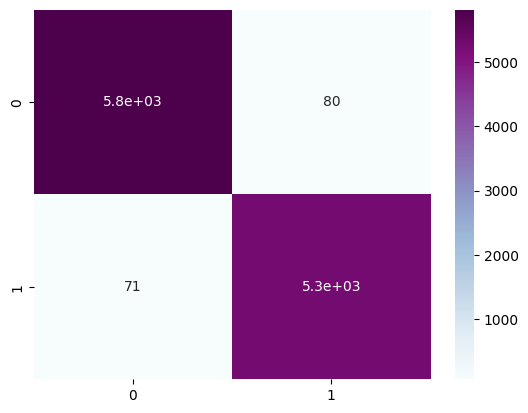

In [30]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,pred_LR)
print(cm)
import seaborn as sns
sns.heatmap(cm,cmap="BuPu",annot=True)


In [31]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(xv_train,y_train)
DT.score(xv_test,y_test).round(2)
pred_DT = DT.predict(xv_test)
print(classification_report(y_test,pred_DT))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5890
           1       1.00      1.00      1.00      5330

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



[[5868   22]
 [  23 5307]]


<Axes: >

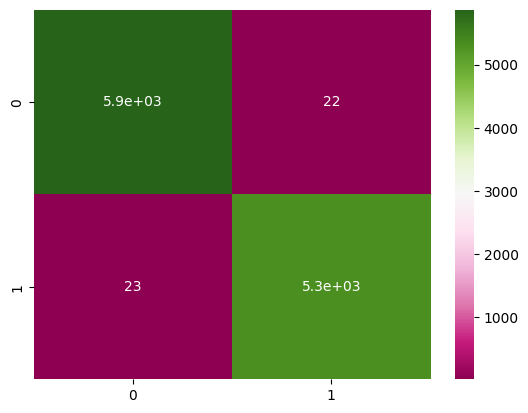

In [32]:
cm= confusion_matrix(y_test,pred_DT)
print(cm)
import seaborn as sns
sns.heatmap(cm,cmap="PiYG",annot=True)

In [33]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train,y_train)
RFC.score(xv_test,y_test)
pred_RFC = RFC.predict(xv_test)
print(classification_report(y_test,pred_RFC))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5890
           1       0.99      0.99      0.99      5330

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



[[5827   63]
 [  62 5268]]


<Axes: >

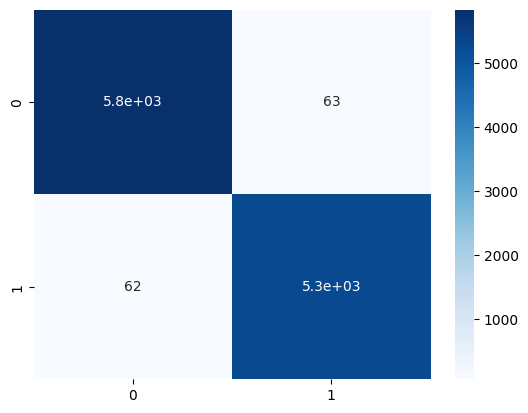

In [34]:
cm= confusion_matrix(y_test,pred_RFC)
print(cm)
import seaborn as sns
sns.heatmap(cm,cmap="Blues",annot=True)

In [35]:
#test the prediction:
def output_lable(n):
    if n == 0:
        return "FAKE News"
    elif n == 1:
        return "TRUE News"

def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(filtering)
    new_x_test = new_def_test["text"]
    new_xv_test = vector.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction: {}  \nRFC Prediction: {}".format(output_lable(pred_LR[0]),
                                                                                          output_lable(pred_DT[0]),

                                                                                                              output_lable(pred_RFC[0])))


In [36]:
news = str(input())
manual_testing(news)

Donald Trump is dead


LR Prediction: FAKE News 
DT Prediction: FAKE News  
RFC Prediction: FAKE News
